# Image Classification with Cifar-10 Dataset Using CNN on Tensorflow

In this notebook, I am going to make a classifier for CIFAR-10 Dataset using Convolutional Neural Network. The classifier is CNN based model. The CNN model should be feed with the images that has been preprocessed and normalized first. The classifier should then test the test set and make a classification of each test set. This notebook was run in NVIDIA GTX 1050, and intel Core i5 with cuda 10.1, cudnn 10.1, using tensorflow 1.13.1

# Get the Data 
The dataset of Cifar-10 can be found here : https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
For a simplicity purpose, I have reupload the Cifar-10 dataset with .csv format in my github. The label is in the last column. In this notebook I will be using this dataset.

First import the preprocessing library that will be useful for our project. Pandas package is use for data structure and data manipulation. preprocessing package from sklearn is used to normalize our images. train_test_split package is used to split our dataset as test images, train images, and validation images.

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Read the dataset (images and labels) then store it in dataset variable. Our images size is 32x32x3 = 3072 columns. 32x32 is the image size and 3 means RGB. The last column is our labels. We store the images in X_data variable and the labels in y_data variable. 

In [8]:
dataset = pd.read_csv("dataset.csv")
X_data = dataset.iloc[:, :-1].values
y_data = dataset.iloc[:, -1].values

Our labels is an integer from 0 - 9 which is stand for : <br>
- airplane   : 0 <br>
- automobile : 1 <br>
- bird       : 2 <br>
- cat        : 3 <br>
- deer       : 4 <br>
- dog        : 5 <br>
- frog       : 6 <br>
- horse      : 7 <br>
- ship       : 8 <br>
- truck      : 9

We Check out the random picture that is stored in our dataset and match it with the label. To do that, we should reshape our sample image from the shape of (_,3072) into (_,32,32,3). Then we visualize our data using matplotlib package.

Our shape of random image :  (3072,)
Our new shape of images :  (32, 32, 3)

Our label is :  1
Our image is :


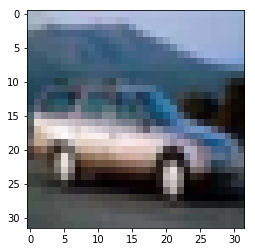

In [3]:
sample_img= X_data[4]
sample_label = y_data[4]

print("Our shape of random image : ",sample_img.shape)

sample_img = sample_img.reshape(32, 32, 3) #Reshape our sample image
print("Our new shape of images : ", sample_img.shape)

import matplotlib.pyplot as plt #Import oyr matplotlib package
%matplotlib inline

plt.imshow(sample_img) #Visualize the image
print()
print("Our label is : ", sample_label)
print("Our image is :")

# Preprocess the Data

Our images have a pixel values ranging from 0 - 255. So we would normalize it, so it has mean = 0 and std deviation <= 1. <br>
we would also like to one hot encode our labels. instead of having values 0 - 9, it will have 10 columns with represent each objects. <br>
After that, we split our data, 70% for training data, 15% for validation data, and 15% for testing data. Since the data has been spread randomly, we do not need to randomise our splitting data.

In [9]:
X_data = preprocessing.normalize(X_data) #Normalize our images

y_data = pd.get_dummies(y_data) #One hot encode our labels

img_size = 32
num_channel = 3 #RGB
X_data = X_data.reshape(len(dataset), img_size, img_size, num_channel) #WxH = 32x32, RGB

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size = 0.3, random_state = 0) #split train data for 0.7
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0) #split test data for 0.15 and val data for 0.15

# Create the CNN Model, Loss, and Optimizer

To create the CNN model we will be using Tensorflow. Our CNN architecture as shown below : <br>
![CNN Architecture](https://drive.google.com/open?id=1kWWgqA_5q9pXdaGmSudygeMTJtsT9NRo) <br>
This architecture use the relu activation function for the hidden layers and use softmax in the output layer. Since we want to classify based on 10 different objects, then our final layer should have 10 nodes. Each node represent 1 object. <br>
The architecture of CNN is hyperparameter, you can modify it till you get the best model's accuracy.

In [10]:
import tensorflow as tf
def LeNet_5 (X):
    # Layer 1: convolution layer 5x5, input =32x32x3, output = 32x32x64
    conv1_w = tf.get_variable("W1",initializer = tf.truncated_normal(shape = [5,5,3,64], mean = 0, stddev = 0.1))
    conv1_b = tf.get_variable("b1",initializer = tf.zeros(64))
    conv1 = tf.nn.conv2d(X, conv1_w, strides = [1,1,1,1], padding = 'SAME') + conv1_b
    #TODO : Activation
    conv1 = tf.nn.relu(conv1)
    
    #Pooling Layer. Input = 32x32x64, Output = 16x16x64
    pool_1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    #Layer 2: Convolution layer 5x5, input 16x16x64, Output = 16x16x128
    conv2_w = tf.get_variable("W2",initializer = tf.truncated_normal(shape = [5,5,64,128], mean = 0, stddev = 0.1))
    conv2_b = tf.get_variable("b2",initializer = tf.zeros(128))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'SAME') + conv2_b
    #TODO: Activation
    conv2 = tf.nn.relu(conv2)
    
    #Pooling Layer, Input = 16x16x64, Output = 8x8x64
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    #Layer 3: Convolution layer 5x5, input 8x8x64, Output = 8x8x256
    conv3_w = tf.get_variable("W3",initializer = tf.truncated_normal(shape = [5,5,128, 256], mean = 0, stddev = 0.1))
    conv3_b = tf.get_variable("b3",initializer = tf.zeros(256))
    conv3 = tf.nn.conv2d(pool_2, conv3_w, strides = [1,1,1,1], padding = 'SAME') + conv3_b
    #TODO: Activation
    conv3 = tf.nn.relu(conv3)
    
    #Pooling Layer, Input = 8x8x256, Output = 4x4x256
    pool_3 = tf.nn.max_pool(conv3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    #Layer 4: Convolution layer 5x5, input 4x4x256, Output = 4x4x512
    conv4_w = tf.get_variable("W4",initializer = tf.truncated_normal(shape = [5,5,256,512], mean = 0, stddev = 0.1))
    conv4_b = tf.get_variable("b4",initializer = tf.zeros(512))
    conv4 = tf.nn.conv2d(pool_3, conv4_w, strides = [1,1,1,1], padding = 'SAME') + conv4_b
    #TODO: Activation
    conv4 = tf.nn.relu(conv4)
    
    #Pooling Layer, Input = 4x4x512, Output = 2x2x512
    pool_4 = tf.nn.max_pool(conv4, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    #TODO : Flatten, Input = 2x2x512, Output = 2048
    fc1 = tf.contrib.layers.flatten(pool_4)
    
    #Layer3: Fully Connected Layer. Input = 2048, Output = 1024
    fc1_w = tf.get_variable("W5",initializer = tf.truncated_normal(shape = (2048,1024), mean = 0, stddev = 0.08))
    fc1_b = tf.get_variable("b5",initializer = tf.zeros(1024))
    fc1 = tf.matmul(fc1, fc1_w) + fc1_b
    #TODO: Activation
    fc1 = tf.nn.relu(fc1)
    
    #Layer4 : Fully Connected Layer. Input = 1024, Output = 512
    fc2_w = tf.get_variable("W6",initializer = tf.truncated_normal(shape = (1024, 512), mean = 0, stddev = 0.08))
    fc2_b = tf.get_variable("b6",initializer = tf.zeros(512))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    #TODO: Activation
    fc2 = tf.nn.relu(fc2)
    
    #Layer5 : Fully Connected Layer. Input = 512, Output = 256
    fc3_w = tf.get_variable("W7",initializer = tf.truncated_normal(shape = (512, 256), mean = 0, stddev = 0.08))
    fc3_b = tf.get_variable("b7",initializer = tf.zeros(256))
    fc3 = tf.matmul(fc2, fc3_w) + fc3_b
    #TODO: Activation
    fc3 = tf.nn.relu(fc3)
    
    #Layer6 : Fully Connected Layer. Input = 256, Output = 128
    fc4_w = tf.get_variable("W8", initializer = tf.truncated_normal(shape = (256, 128), mean = 0, stddev = 0.08))
    fc4_b = tf.get_variable("b8", initializer = tf.zeros(128))
    fc4 = tf.matmul(fc3, fc4_w) + fc4_b
    #TODO: Activation
    fc4 = tf.nn.relu(fc4)
    
    #Layer7 : Fully Connected Layer. Input = 128, Output = 64
    fc5_w = tf.get_variable("W9", initializer = tf.truncated_normal(shape = (128, 64), mean = 0, stddev = 0.08))
    fc5_b = tf.get_variable("b9", initializer = tf.zeros(64))
    fc5 = tf.matmul(fc4, fc5_w) + fc5_b
    #TODO: Activation
    fc5 = tf.nn.relu(fc5)
    
    #Layer5 : Fully Connected Layer, Input = 64, Output = 10
    fc6_w = tf.get_variable("W10", initializer = tf.truncated_normal(shape = (64, 10), mean = 0, stddev = 0.08))
    fc6_b = tf.get_variable("b10", initializer = tf.zeros(10))
    logits = tf.matmul(fc5, fc6_w) + fc6_b
    
    return logits

We store the images and labels that we will assign to the model in placeholder. X for the images and y for the labels. Placeholder in tensorflow are used to feed external data into TensorFlow graph. <br> Check out [this](https://www.quora.com/What-is-the-difference-between-Variables-and-Placeholders-in-tensor-flow) Q&A discussion in quora for detail explanation about TensorFlow's placeholder.<br><br>
we define the model in the main code as logits.

In [11]:
X = tf.placeholder(tf.float32, shape = [None, 32,32,3]) #X placeholder
y = tf.placeholder(tf.int32, shape = [None,10]) #y placeholder

logits = LeNet_5(X)

Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.


We will be using the categorical_cross_entropy as our loss function and Adam as our optimizer. We update our model's weights and bias by reducing our loss function. We use learning rate of 0.0015. The learning rate value is hyperparameter. If the learning rate value is too high then it will oscillate around the minimum value. While if the learning rate is too low, it will be computationally expensive.

In [12]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = logits) #compute the cross entropy losses
loss_operation = tf.reduce_mean(cross_entropy) #Reduce the cross entropy losses into single unit by taking the mean of it

optimizer = tf.train.AdamOptimizer(learning_rate = 0.0015)
training_operation = optimizer.minimize(loss_operation) #Backpropragate our model using Adam optimizer

#To train and evaluate the model
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(y,1)) #sum all the match prediction and labels
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #Store the accuracy of our input data.

# Train our Model

We train our model with 50 iterations/epochs. each iteration runs for 128 batches size. In TensorFlow, we can only run our model inside a session. Our training process will run inside the session. We are training with 128 batches size. If we have X images for our training set. Then, each process of training will take X/128 images instead of a single image. 

In [15]:
EPOCHS = 10
BATCH_SIZE = 128    
    
#Train data till 50 epochs
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer()) #Initialize global variables
    num_examples = len(X_train)
      
    print("Training... with dataset - ", num_examples)
    print()
    for i in range(EPOCHS):
        step = int(len(X_train)/BATCH_SIZE)
        for offset in range(0, BATCH_SIZE):
            batch_X, batch_y = X_train[step*offset:step*(offset+1)], y_train[step*offset:step*(offset+1)]
            sess.run(training_operation, feed_dict = {X: batch_X, y: batch_y})
        
        validation_accuracy = sess.run(accuracy_operation, feed_dict = {X: X_val, y: y_val})
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy =  {:.3f}".format(validation_accuracy))
        print()
        
    '''Saving the trained model'''
    saver = tf.train.Saver()
    save_path = saver.save(sess, 'tmp1/convnet.ckpt') 
    print("Model saves ")

Training... with dataset -  35000

EPOCH 1 ...
Validation Accuracy =  0.394

EPOCH 2 ...
Validation Accuracy =  0.508

EPOCH 3 ...
Validation Accuracy =  0.558

EPOCH 4 ...
Validation Accuracy =  0.581

EPOCH 5 ...
Validation Accuracy =  0.625

EPOCH 6 ...
Validation Accuracy =  0.608

EPOCH 7 ...
Validation Accuracy =  0.593

EPOCH 8 ...
Validation Accuracy =  0.608

EPOCH 9 ...
Validation Accuracy =  0.596

EPOCH 10 ...
Validation Accuracy =  0.610

Model saves 


# Test our Model

After We have succesfully trained our model, then we should test it with our test set. Test set should not be feeded in the training process. Because we want to test how accurate our model to classify unseen images.

In [19]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    model = saver.restore(sess, "tmp1/convnet.ckpt")
    test_accuracy = sess.run(accuracy_operation, feed_dict = {X: X_test, y: y_test})
    print("Test Accuracy = ", test_accuracy)

INFO:tensorflow:Restoring parameters from tmp1/convnet.ckpt
Test Accuracy =  0.6164
